# Oversampling and Undersampling for Balanced Movie Dataset

The script applies undersampling and oversampling techniques to address class imbalance in the dataset. 
This involves:

**Oversampling**: Increasing the number of samples in underrepresented language groups by duplicating existing samples until each group has an equal number of entries.

**Undersampling:** Reducing the number of samples in overrepresented language groups to match the count of the least represented group.

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('data/cleaned_movies_2015_2023_genres.csv')
df_cleaned.head()

,title,release_year,language,genre,overview,vote_average,vote_count,popularity
0,Pad Man,2018,Indisch,Humor,upon realizing extent woman affected menses se...,7.420,200.0,7.036
1,Tamasha,2015,Indisch,Humor,meeting vacation ved tara sense connection vow...,6.720,141.0,8.770
2,Tu Jhoothi Main Makkaar,2023,Indisch,Humor,earn extra cash mickey help couple break life ...,6.253,144.0,10.045
3,Hindi Medium,2017,Indisch,Humor,mita raj batra affluent couple delhi chandni c...,7.300,166.0,7.001
4,Dilwale,2015,Indisch,Humor,raj mafia member one day meet girl meera chasi...,6.648,301.0,11.501


In [19]:
# **1. Undersampling (Downsampling)**
# Find the count of the minority class
min_count = df_cleaned['language'].value_counts().min()

# Downsample each language to the minority class count
df_balanced_down = df_cleaned.groupby('language').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

/tmp/ipykernel_10795/3419068042.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_down = df_cleaned.groupby('language').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


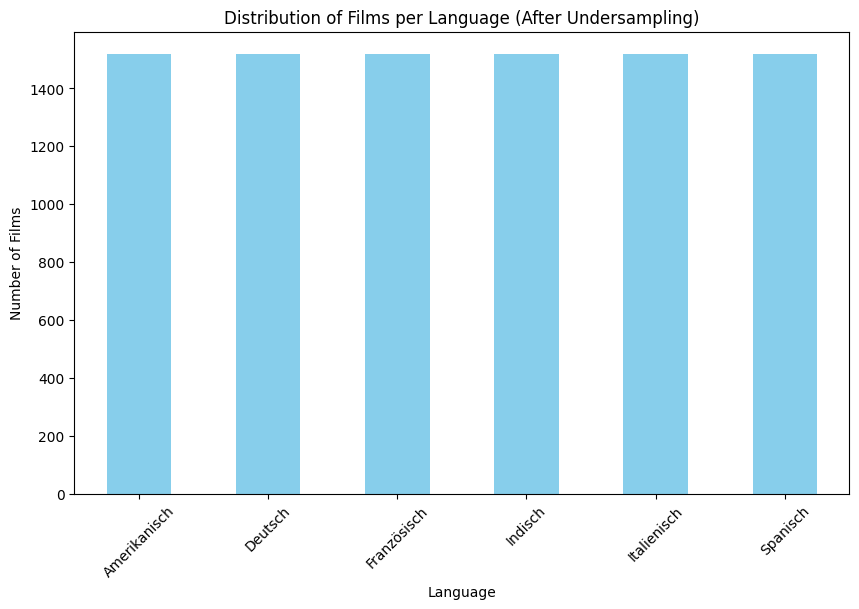

In [20]:

# Visualize the distribution after undersampling
plt.figure(figsize=(10, 6))
df_balanced_down['language'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Films per Language (After Undersampling)')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

# Save the undersampled data
df_balanced_down.to_csv('data/undersampled_movies_2015_2023_genres.csv', index=False)

In [21]:
# **2. Oversampling (Upsampling)**
# Find the count of the majority class
max_count = df_cleaned['language'].value_counts().max()

# Upsample each language to the majority class count
df_balanced_over = df_cleaned.groupby('language').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)

/tmp/ipykernel_10795/4139491947.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_over = df_cleaned.groupby('language').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)


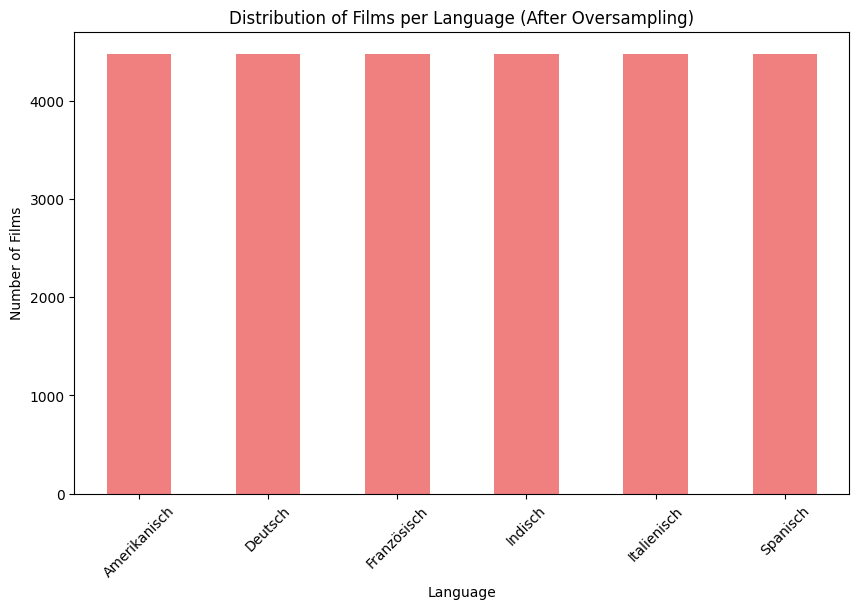

Undersampling and oversampling completed. Data saved to CSV files.


In [22]:
# Visualize the distribution after oversampling
plt.figure(figsize=(10, 6))
df_balanced_over['language'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Films per Language (After Oversampling)')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

# Save the oversampled data
df_balanced_over.to_csv('data/oversampled_movies_2015_2023_genres.csv', index=False)

print("Undersampling and oversampling completed. Data saved to CSV files.")

**oversampling and undersampling** are essential for classification when working with imbalanced datasets especially when dealing with multiple classes (in our case, movie languages), a balanced dataset is crucial for building a reliable model. They ensure that each class has a sufficient number of samples for the model to learn from, preventing bias toward the majority classes and ultimately leading to a more robust and accurate classification model.